In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

# OpenMP ANALYSIS

In [112]:
def calculate_speedup(group):
    group['speedup'] =  group['mean_time'].iloc[0] / group['mean_time']
    return group

In [135]:
current_directory = os.getcwd()
print("Current Working Directory:", current_directory) # To reset wd to default one

sections = ['initialization','evolve_static', 'evolve_ordered']
df = pd.DataFrame(columns=['size', 'threads', 'time', 'section'])
df


for sec in sections:
    if sec == 'initialization':
        file_pattern=f"results/{sec}/openMP_generate.csv"
        df_temp = pd.read_csv(file_pattern)
        df_temp['section'] = sec + "_generate"
        df=pd.concat([df, df_temp])

        file_pattern=f"results/{sec}/openMP_write.csv"
        df_temp = pd.read_csv(file_pattern)
        df_temp['section'] = sec + "_write"
        df=pd.concat([df, df_temp])
    else:
        file_pattern=f"results/{sec}/openMP.csv"
        df_temp = pd.read_csv(file_pattern)
        df_temp['section'] = sec
        df=pd.concat([df, df_temp])

Current Working Directory: /Users/samuele/Documents/Università/Magistrale/Corsi/HPC/FHPC_Assignment/Exercise1


In [136]:
df

,size,threads,time,section
0,20000,1,1.178866,initialization_generate
1,20000,1,1.177179,initialization_generate
2,20000,1,1.179440,initialization_generate
3,20000,1,1.179537,initialization_generate
4,20000,1,1.177962,initialization_generate
...,...,...,...,...
30,10000,64,485.719639,evolve_ordered
31,10000,64,489.395695,evolve_ordered
32,10000,64,479.337697,evolve_ordered
33,10000,64,495.783095,evolve_ordered


# Evolve static
Now, for example, to analyze the openMP scalability of evolve static, we can simply slice the corresponding part of the dataframe

In [122]:
df_evolve_static = df[df['section']=='evolve_static']
df_evolve_static

,size,threads,time,section
0,10000,1,77.684671,evolve_static
1,10000,1,77.816483,evolve_static
2,10000,1,77.844269,evolve_static
3,10000,1,77.849604,evolve_static
4,10000,1,77.824747,evolve_static
...,...,...,...,...
175,20000,64,5.101643,evolve_static
176,20000,64,5.120398,evolve_static
177,20000,64,5.101622,evolve_static
178,20000,64,5.119469,evolve_static


In [115]:
grouped_df_evolve_static = df_evolve_static.groupby(['size', 'threads'])['time'].agg(['mean', 'std']).reset_index()
grouped_df_evolve_static = grouped_df_evolve_static.rename(columns={'mean': 'mean_time', 'std': 'std_time'})
grouped_df_evolve_static

,size,threads,mean_time,std_time
0,10000,1,77.803955,0.068057
1,10000,2,38.866469,0.013706
2,10000,4,19.440782,0.009446
3,10000,8,9.868833,0.019702
4,10000,12,6.546463,0.006467
5,10000,16,4.934244,0.005987
6,10000,20,3.941343,0.003912
7,10000,24,3.326014,0.016730
8,10000,28,2.855158,0.002481
9,10000,32,2.515911,0.015157


In [116]:
grouped_df_evolve_static = grouped_df_evolve_static.groupby('size', group_keys=False).apply(calculate_speedup).reset_index(drop=True)
grouped_df_evolve_static

,size,threads,mean_time,std_time,speedup
0,10000,1,77.803955,0.068057,1.000000
1,10000,2,38.866469,0.013706,2.001827
2,10000,4,19.440782,0.009446,4.002100
3,10000,8,9.868833,0.019702,7.883805
4,10000,12,6.546463,0.006467,11.884884
5,10000,16,4.934244,0.005987,15.768161
6,10000,20,3.941343,0.003912,19.740466
7,10000,24,3.326014,0.016730,23.392555
8,10000,28,2.855158,0.002481,27.250311
9,10000,32,2.515911,0.015157,30.924759


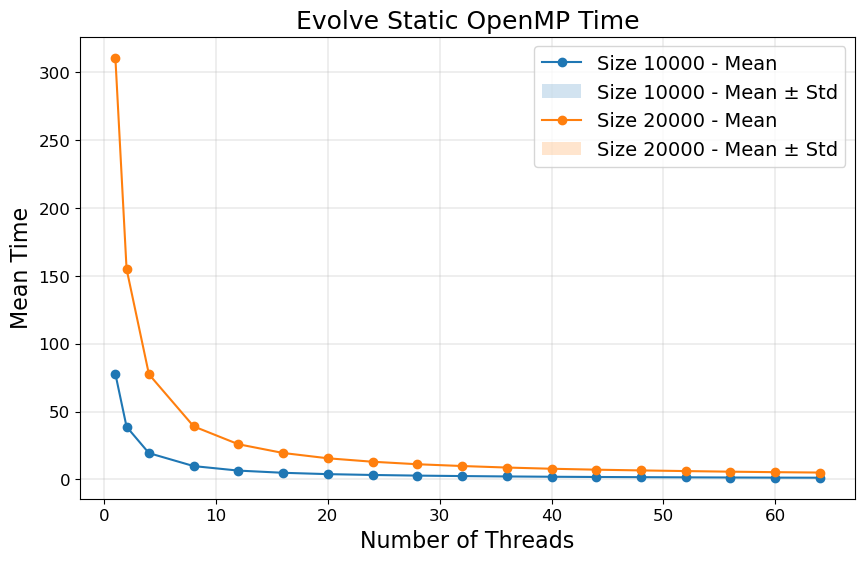

In [22]:
# Separate the DataFrame into two subsets based on size
df_10000 = grouped_df_evolve_static[grouped_df_evolve_static['size'] == 10000]
df_20000 = grouped_df_evolve_static[grouped_df_evolve_static['size'] == 20000]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot for size 10000
plt.plot(df_10000['threads'], df_10000['mean_time'], label='Size 10000 - Mean', marker='o')
plt.fill_between(df_10000['threads'], df_10000['mean_time'] - df_10000['std_time'], df_10000['mean_time'] + df_10000['std_time'], alpha=0.2, label='Size 10000 - Mean ± Std')

# Plot for size 20000
plt.plot(df_20000['threads'], df_20000['mean_time'], label='Size 20000 - Mean', marker='o')
plt.fill_between(df_20000['threads'], df_20000['mean_time'] - df_20000['std_time'], df_20000['mean_time'] + df_20000['std_time'], alpha=0.2, label='Size 20000 - Mean ± Std')

# Add labels and title
plt.xlabel('Number of Threads', fontsize = 16)
plt.ylabel('Mean Time', fontsize = 16)
plt.title('Evolve Static OpenMP Time', fontsize = 18)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend(fontsize=14)

# Show the plot
plt.grid(linewidth = 0.3)
plt.show()

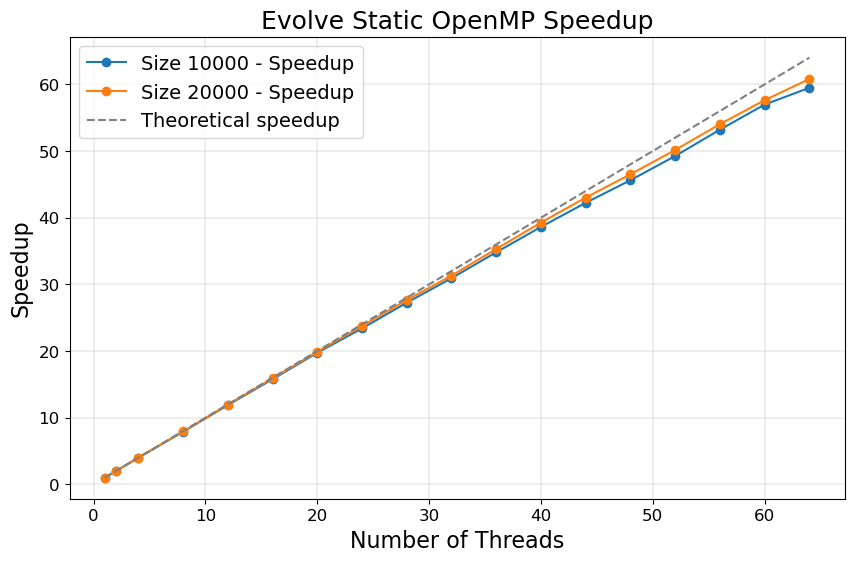

In [21]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot for size 10000
plt.plot(df_10000['threads'], df_10000['speedup'], label='Size 10000 - Speedup', marker='o')

# Plot for size 20000
plt.plot(df_20000['threads'], df_20000['speedup'], label='Size 20000 - Speedup', marker='o')

# Plot to show optimal speedup
plt.plot(df_10000['threads'], df_10000['threads'], linestyle='--', color='gray', label='Theoretical speedup')


# Add labels and title
plt.xlabel('Number of Threads', fontsize = 16)
plt.ylabel('Speedup', fontsize = 16)
plt.title('Evolve Static OpenMP Speedup', fontsize = 18)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend(fontsize=14)

# Show the plot
plt.grid(linewidth = 0.3)
plt.show()


# Evolve ordered

In [93]:
df_evolve_ordered = df[df['section']=='evolve_ordered']
df_evolve_ordered

grouped_df_evolve_ordered = df_evolve_ordered.groupby(['size', 'threads'])['time'].agg(['mean', 'std']).reset_index()
grouped_df_evolve_ordered = grouped_df_evolve_ordered.rename(columns={'mean': 'mean_time', 'std': 'std_time'})
grouped_df_evolve_ordered = grouped_df_evolve_ordered.groupby('size', group_keys=False).apply(calculate_speedup).reset_index(drop=True)
grouped_df_evolve_ordered

,size,threads,mean_time,std_time,speedup
0,10000,1,315.663035,0.092817,1.000000
1,10000,2,311.797344,0.058453,1.012398
2,10000,4,323.431293,0.043643,0.975982
3,10000,8,346.936282,0.611479,0.909859
4,10000,16,380.682292,0.962120,0.829203
5,10000,32,456.907405,8.452096,0.690869
6,10000,64,483.578258,10.711132,0.652765


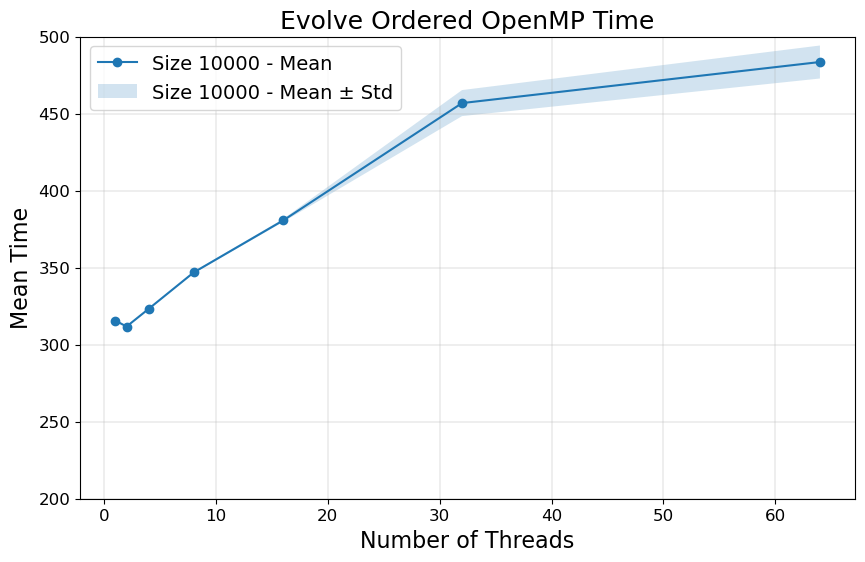

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have your DataFrame, let's call it 'df'

# Separate the DataFrame into two subsets based on size

# Create the plot
plt.figure(figsize=(10, 6))

# Plot for size 10000
plt.plot(grouped_df_evolve_ordered['threads'], grouped_df_evolve_ordered['mean_time'], label='Size 10000 - Mean', marker='o')
plt.fill_between(grouped_df_evolve_ordered['threads'], grouped_df_evolve_ordered['mean_time'] - grouped_df_evolve_ordered['std_time'], grouped_df_evolve_ordered['mean_time'] + grouped_df_evolve_ordered['std_time'], alpha=0.2, label='Size 10000 - Mean ± Std')

# Add labels and title
plt.xlabel('Number of Threads', fontsize = 16)
plt.ylabel('Mean Time', fontsize = 16)
plt.title('Evolve Ordered OpenMP Time', fontsize = 18)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend(fontsize=14)

plt.ylim([200, 500])

# Show the plot
plt.grid(linewidth = 0.3)
plt.show()

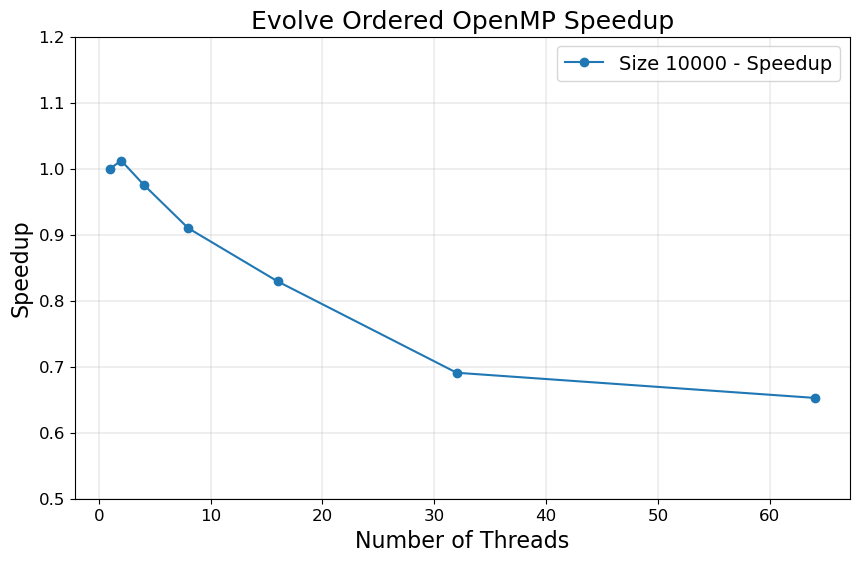

In [100]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot for size 10000
plt.plot(grouped_df_evolve_ordered['threads'], grouped_df_evolve_ordered['speedup'], label='Size 10000 - Speedup', marker='o')

# Plot to show optimal speedup
#plt.plot(grouped_df_evolve_ordered['threads'], grouped_df_evolve_ordered['threads'], linestyle='--', color='gray', label='Theoretical speedup')

# Add labels and title
plt.xlabel('Number of Threads', fontsize = 16)
plt.ylabel('Speedup', fontsize = 16)
plt.title('Evolve Ordered OpenMP Speedup', fontsize = 18)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend(fontsize=14)

plt.ylim([0.5, 1.2])

# Show the plot
plt.grid(linewidth = 0.3)
plt.show()

# Generation

In [137]:
df_initialize_generate = df[df['section']=='initialization_generate']

grouped_df_initialize_generate = df_initialize_generate.groupby(['size', 'threads'])['time'].agg(['mean', 'std']).reset_index()
grouped_df_initialize_generate = grouped_df_initialize_generate.rename(columns={'mean': 'mean_time', 'std': 'std_time'})
grouped_df_initialize_generate = grouped_df_initialize_generate.groupby('size', group_keys=False).apply(calculate_speedup).reset_index(drop=True)
grouped_df_initialize_generate

,size,threads,mean_time,std_time,speedup
0,20000,1,1.178597,0.001010,1.000000
1,20000,2,0.619733,0.008061,1.901782
2,20000,4,0.331907,0.004806,3.550981
3,20000,8,0.191601,0.005664,6.151315
4,20000,12,0.138754,0.006635,8.494134
5,20000,16,0.107600,0.003794,10.953461
6,20000,20,0.105179,0.011854,11.205650
7,20000,24,0.098766,0.006733,11.933224
8,20000,28,0.081607,0.009266,14.442279
9,20000,32,0.088494,0.011567,13.318411


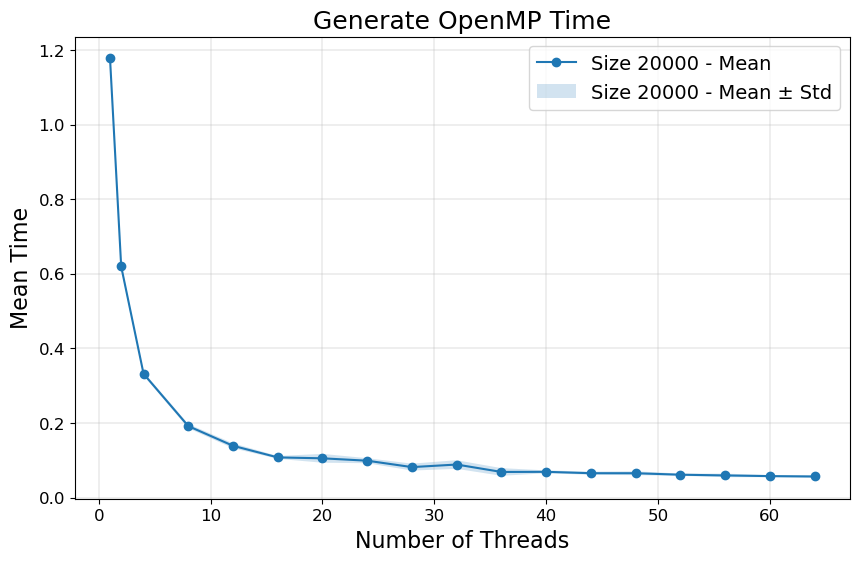

In [138]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have your DataFrame, let's call it 'df'

# Separate the DataFrame into two subsets based on size

# Create the plot
plt.figure(figsize=(10, 6))

# Plot for size 10000
plt.plot(grouped_df_initialize_generate['threads'], grouped_df_initialize_generate['mean_time'], label='Size 20000 - Mean', marker='o')
plt.fill_between(grouped_df_initialize_generate['threads'], grouped_df_initialize_generate['mean_time'] - grouped_df_initialize_generate['std_time'], grouped_df_initialize_generate['mean_time'] + grouped_df_initialize_generate['std_time'], alpha=0.2, label='Size 20000 - Mean ± Std')

# Add labels and title
plt.xlabel('Number of Threads', fontsize = 16)
plt.ylabel('Mean Time', fontsize = 16)
plt.title('Generate OpenMP Time', fontsize = 18)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend(fontsize=14)

# Show the plot
plt.grid(linewidth = 0.3)
plt.show()

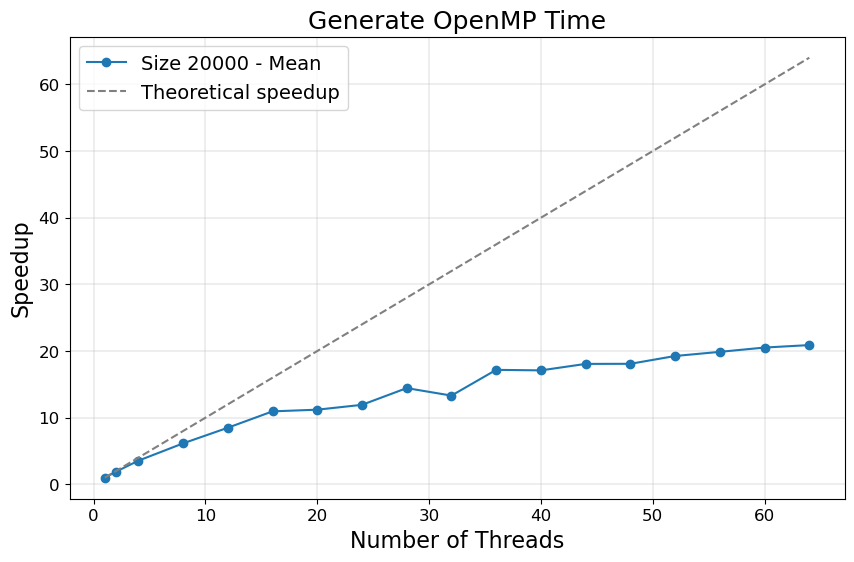

In [139]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have your DataFrame, let's call it 'df'

# Create the plot
plt.figure(figsize=(10, 6))

# Plot for size 10000
plt.plot(grouped_df_initialize_generate['threads'], grouped_df_initialize_generate['speedup'], label='Size 0000 - Mean', marker='o')

# Plot to show optimal speedup
plt.plot(grouped_df_initialize_generate['threads'], grouped_df_initialize_generate['threads'], linestyle='--', color='gray', label='Theoretical speedup')


# Add labels and title
plt.xlabel('Number of Threads', fontsize = 16)
plt.ylabel('Speedup', fontsize = 16)
plt.title('Generate OpenMP Time', fontsize = 18)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend(fontsize=14)

# Show the plot
plt.grid(linewidth = 0.3)
plt.show()

# STRONG MPI SOCKET/NUMA

In [128]:
current_directory = os.getcwd()
print("Current Working Directory:", current_directory) # To reset wd to default one

sections = ['initialization','evolve_static', 'evolve_ordered']
types = ['socket', 'numa']
df = pd.DataFrame(columns=['size', 'processes', 'time', 'section', 'type'])
df


for sec in sections:
    for ty in types:
        if (sec == 'evolve_ordered') & (ty == 'socket'):
            continue
        if sec == 'initialization':
            file_pattern=f"results/{sec}/strong_MPI_{ty}_generate.csv"
            df_temp = pd.read_csv(file_pattern)
            df_temp['section'] = sec + "_generate"
            df_temp['type'] = ty
            df=pd.concat([df, df_temp])

            file_pattern=f"results/{sec}/strong_MPI_{ty}_write.csv"
            df_temp = pd.read_csv(file_pattern)
            df_temp['section'] = sec + "_write"
            df_temp['type'] = ty
            df=pd.concat([df, df_temp])
        else:
            file_pattern=f"results/{sec}/strong_MPI_{ty}.csv"
            df_temp = pd.read_csv(file_pattern)
            df_temp['section'] = sec
            df_temp['type'] = ty
            df=pd.concat([df, df_temp])

Current Working Directory: /Users/samuele/Documents/Università/Magistrale/Corsi/HPC/FHPC_Assignment/Exercise1


In [102]:
df

,size,processes,time,section,type
0,10000,1,0.107384,initialization_generate,socket
1,10000,1,0.104790,initialization_generate,socket
2,10000,1,0.105182,initialization_generate,socket
3,10000,1,0.108027,initialization_generate,socket
4,10000,1,0.097473,initialization_generate,socket
...,...,...,...,...,...
20,10000,16,491.099029,evolve_ordered,numa
21,10000,16,491.102689,evolve_ordered,numa
22,10000,16,491.030901,evolve_ordered,numa
23,10000,16,491.040411,evolve_ordered,numa


# Evolve static
Now, for example, to analyze the openMP scalability of evolve static, we can simply slice the corresponding part of the dataframe

In [68]:
df_evolve_static = df[df['section']=='evolve_static']
df_evolve_static

,size,processes,time,section,type
0,10000,1,19.484103,evolve_static,socket
1,10000,1,19.492578,evolve_static,socket
2,10000,1,19.531506,evolve_static,socket
3,10000,1,19.496531,evolve_static,socket
4,10000,1,19.504113,evolve_static,socket
...,...,...,...,...,...
115,20000,16,5.285263,evolve_static,numa
116,20000,16,5.424560,evolve_static,numa
117,20000,16,5.671236,evolve_static,numa
118,20000,16,5.597710,evolve_static,numa


In [69]:
grouped_df_evolve_static = df_evolve_static.groupby(['size', 'processes', 'type'])['time'].agg(['mean', 'std']).reset_index()
grouped_df_evolve_static = grouped_df_evolve_static.rename(columns={'mean': 'mean_time', 'std': 'std_time'})
grouped_df_evolve_static = grouped_df_evolve_static.groupby('size', group_keys=False).apply(calculate_speedup).reset_index(drop=True)
grouped_df_evolve_static

,size,processes,type,mean_time,std_time,speedup
0,10000,1,numa,19.576552,0.085827,1.000000
1,10000,1,socket,19.501766,0.018123,1.003835
2,10000,2,numa,9.832527,0.024306,1.990999
3,10000,2,socket,9.805598,0.012794,1.996467
4,10000,3,numa,6.554741,0.002696,2.986625
5,10000,3,socket,6.564079,0.018307,2.982376
6,10000,4,numa,4.940110,0.012616,3.962776
7,10000,4,socket,4.946793,0.016353,3.957423
8,10000,5,numa,3.939404,0.012163,4.969419
9,10000,5,socket,3.986430,0.015273,4.910798


In [70]:
grouped_df_evolve_static[grouped_df_evolve_static['type']=='numa']

,size,processes,type,mean_time,std_time,speedup
0,10000,1,numa,19.576552,0.085827,1.000000
2,10000,2,numa,9.832527,0.024306,1.990999
4,10000,3,numa,6.554741,0.002696,2.986625
6,10000,4,numa,4.940110,0.012616,3.962776
8,10000,5,numa,3.939404,0.012163,4.969419
10,10000,6,numa,3.317434,0.005195,5.901112
12,10000,7,numa,2.854951,0.012378,6.857053
14,10000,8,numa,2.521107,0.019779,7.765061
16,10000,10,numa,2.019795,0.008349,9.692344
17,10000,12,numa,1.718639,0.019091,11.390727


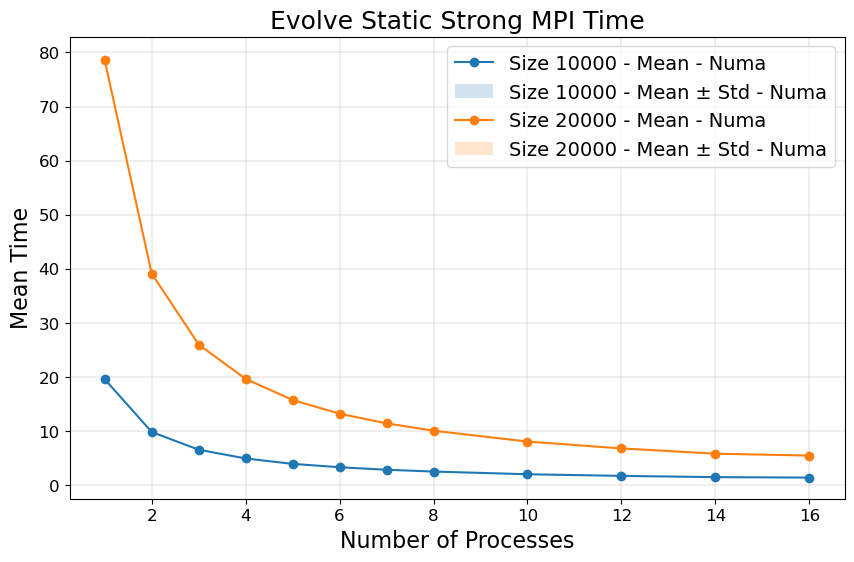

In [71]:
# Separate the DataFrame into two subsets based on size
#df_10000_socket = grouped_df_evolve_static[(grouped_df_evolve_static['size'] == 10000) & (grouped_df_evolve_static['type'] == 'socket')]
#df_20000_socket = grouped_df_evolve_static[(grouped_df_evolve_static['size'] == 20000) & (grouped_df_evolve_static['type'] == 'socket')]
df_10000_numa = grouped_df_evolve_static[(grouped_df_evolve_static['size'] == 10000) & (grouped_df_evolve_static['type'] == 'numa')]
df_20000_numa = grouped_df_evolve_static[(grouped_df_evolve_static['size'] == 20000) & (grouped_df_evolve_static['type'] == 'numa')]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot for size 10000
#plt.plot(df_10000_socket['processes'], df_10000_socket['mean_time'], label='Size 10000 - Mean - Socket', marker='o')
#plt.fill_between(df_10000_socket['processes'], df_10000_socket['mean_time'] - df_10000_socket['std_time'], df_10000_socket['mean_time'] + df_10000_socket['std_time'], alpha=0.2, label='Size 10000 - Mean ± Std - Socket')

# Plot for size 20000
#plt.plot(df_20000_socket['processes'], df_20000_socket['mean_time'], label='Size 20000 - Mean', marker='o')
#plt.fill_between(df_20000_socket['processes'], df_20000_socket['mean_time'] - df_20000_socket['std_time'], df_20000_socket['mean_time'] + df_20000_socket['std_time'], alpha=0.2, label='Size 20000 - Mean ± Std - Socket')

# Plot for size 10000
plt.plot(df_10000_numa['processes'], df_10000_numa['mean_time'], label='Size 10000 - Mean - Numa', marker='o')
plt.fill_between(df_10000_numa['processes'], df_10000_numa['mean_time'] - df_10000_numa['std_time'], df_10000_numa['mean_time'] + df_10000_numa['std_time'], alpha=0.2, label='Size 10000 - Mean ± Std - Numa')

# Plot for size 20000
plt.plot(df_20000_numa['processes'], df_20000_numa['mean_time'], label='Size 20000 - Mean - Numa', marker='o')
plt.fill_between(df_20000_numa['processes'], df_20000_numa['mean_time'] - df_20000_numa['std_time'], df_20000_numa['mean_time'] + df_20000_numa['std_time'], alpha=0.2, label='Size 20000 - Mean ± Std - Numa')


# Add labels and title
plt.xlabel('Number of Processes', fontsize = 16)
plt.ylabel('Mean Time', fontsize = 16)
plt.title('Evolve Static Strong MPI Time', fontsize = 18)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend(fontsize=14)

# Show the plot
plt.grid(linewidth = 0.3)
plt.show()

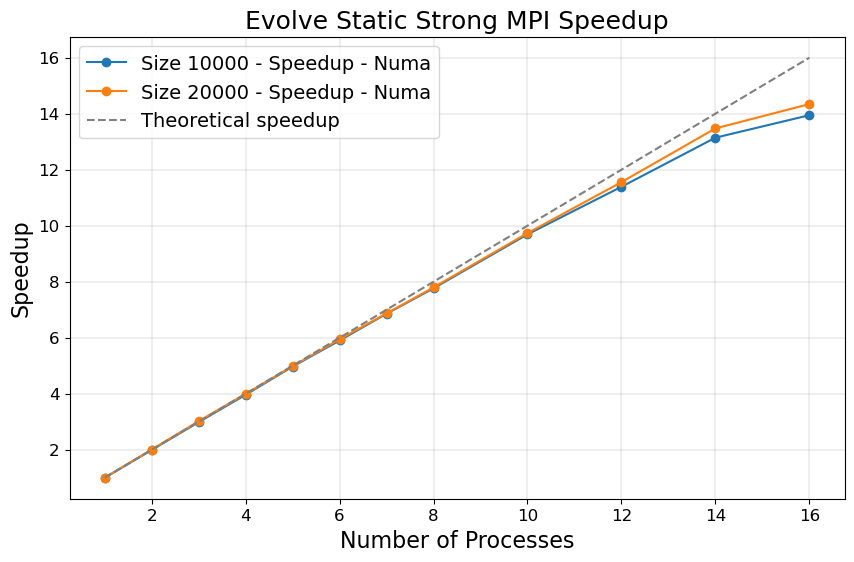

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have your DataFrame, let's call it 'df'

# Separate the DataFrame into two subsets based on size
#df_10000_socket = grouped_df_evolve_static[(grouped_df_evolve_static['size'] == 10000) & (grouped_df_evolve_static['type'] == 'socket')]
#df_20000_socket = grouped_df_evolve_static[(grouped_df_evolve_static['size'] == 20000) & (grouped_df_evolve_static['type'] == 'socket')]
df_10000_numa = grouped_df_evolve_static[(grouped_df_evolve_static['size'] == 10000) & (grouped_df_evolve_static['type'] == 'numa')]
df_20000_numa = grouped_df_evolve_static[(grouped_df_evolve_static['size'] == 20000) & (grouped_df_evolve_static['type'] == 'numa')]

#
# Create the plot
plt.figure(figsize=(10, 6))

# Plot for size 10000
#plt.plot(df_10000_socket['processes'], df_10000_socket['speedup'], label='Size 10000 - Speedup - Socket', marker='o')

# Plot for size 20000
#plt.plot(df_20000_socket['processes'], df_20000_socket['speedup'], label='Size 20000 - Speedup - Socket', marker='o')

# Plot for size 10000
plt.plot(df_10000_numa['processes'], df_10000_numa['speedup'], label='Size 10000 - Speedup - Numa', marker='o')

# Plot for size 20000
plt.plot(df_20000_numa['processes'], df_20000_numa['speedup'], label='Size 20000 - Speedup - Numa', marker='o')

# Theoretical speedup
plt.plot(df_20000_numa['processes'], df_20000_numa['processes'], linestyle='--', color='gray', label='Theoretical speedup')

# Add labels and title
plt.xlabel('Number of Processes', fontsize = 16)
plt.ylabel('Speedup', fontsize = 16)
plt.title('Evolve Static Strong MPI Speedup', fontsize = 18)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend(fontsize=14)

# Show the plot
plt.grid(linewidth = 0.3)
plt.show()

# Evolve Ordered

In [103]:
df_evolve_ordered = df[df['section']=='evolve_ordered'] # ONLY NUMA
df_evolve_ordered

grouped_df_evolve_ordered = df_evolve_ordered.groupby(['size', 'processes', 'type'])['time'].agg(['mean', 'std']).reset_index()
grouped_df_evolve_ordered = grouped_df_evolve_ordered.rename(columns={'mean': 'mean_time', 'std': 'std_time'})
grouped_df_evolve_ordered = grouped_df_evolve_ordered.groupby('size', group_keys=False).apply(calculate_speedup).reset_index(drop=True)
grouped_df_evolve_ordered

,size,processes,type,mean_time,std_time,speedup
0,10000,1,numa,309.340197,0.021491,1.000000
1,10000,2,numa,351.940353,0.035289,0.878956
2,10000,4,numa,393.428070,0.041719,0.786269
3,10000,8,numa,515.461292,0.045175,0.600123
4,10000,16,numa,491.062379,0.035336,0.629941


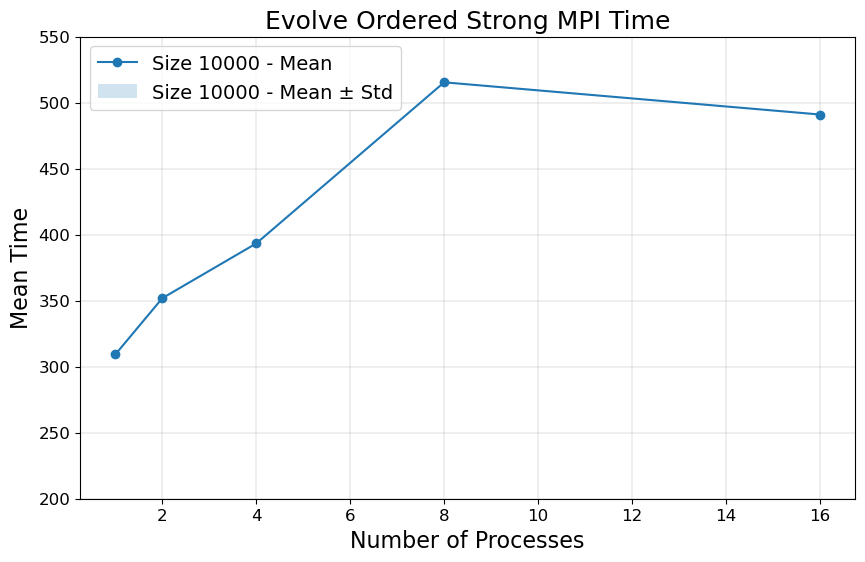

In [108]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot for size 10000
plt.plot(grouped_df_evolve_ordered['processes'], grouped_df_evolve_ordered['mean_time'], label='Size 10000 - Mean', marker='o')
plt.fill_between(grouped_df_evolve_ordered['processes'], grouped_df_evolve_ordered['mean_time'] - grouped_df_evolve_ordered['std_time'], grouped_df_evolve_ordered['mean_time'] + grouped_df_evolve_ordered['std_time'], alpha=0.2, label='Size 10000 - Mean ± Std')

# Add labels and title
plt.xlabel('Number of Processes', fontsize = 16)
plt.ylabel('Mean Time', fontsize = 16)
plt.title('Evolve Ordered Strong MPI Time', fontsize = 18)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend(fontsize=14)

plt.ylim([200, 550])

# Show the plot
plt.grid(linewidth = 0.3)
plt.show()


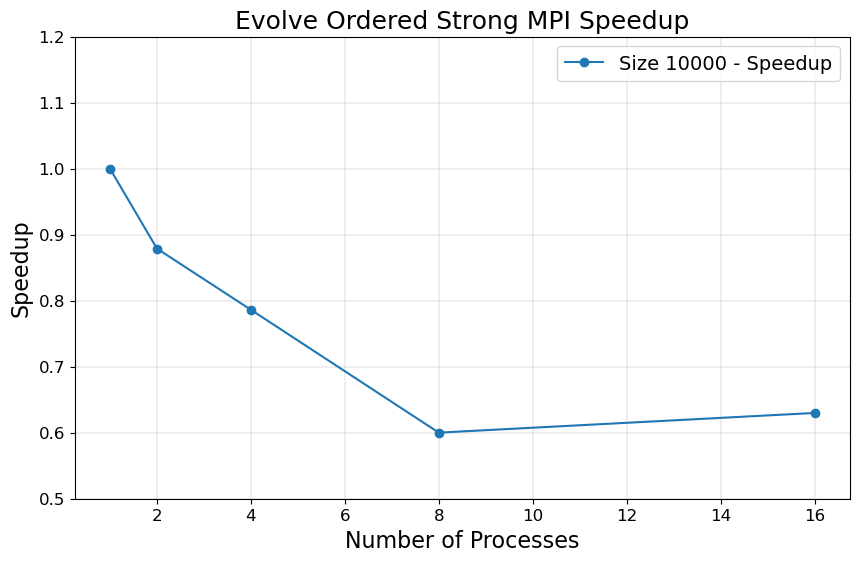

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have your DataFrame, let's call it 'df'

# Create the plot
plt.figure(figsize=(10, 6))

# Plot for size 10000
plt.plot(grouped_df_evolve_ordered['processes'], grouped_df_evolve_ordered['speedup'], label='Size 10000 - Speedup', marker='o')

# Plot to show optimal speedup
#plt.plot(grouped_df_evolve_ordered['threads'], grouped_df_evolve_ordered['threads'], linestyle='--', color='gray', label='Theoretical speedup')


# Add labels and title
plt.xlabel('Number of Processes', fontsize = 16)
plt.ylabel('Speedup', fontsize = 16)
plt.title('Evolve Ordered Strong MPI Speedup', fontsize = 18)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend(fontsize=14)

plt.ylim([0.5, 1.2])

# Show the plot
plt.grid(linewidth = 0.3)
plt.show()


# Generate

In [129]:
df_initialize_generate = df[df['section']=='initialization_generate']

grouped_df_initialize_generate = df_initialize_generate.groupby(['size', 'processes', 'type', 'section'])['time'].agg(['mean', 'std']).reset_index()
grouped_df_initialize_generate = grouped_df_initialize_generate.rename(columns={'mean': 'mean_time', 'std': 'std_time'})
grouped_df_initialize_generate = grouped_df_initialize_generate.groupby('size', group_keys=False).apply(calculate_speedup).reset_index(drop=True)
grouped_df_initialize_generate

,size,processes,type,section,mean_time,std_time,speedup
0,10000,1,numa,initialization_generate,0.074463,0.000624,1.000000
1,10000,1,socket,initialization_generate,0.104571,0.004203,0.712083
2,10000,2,numa,initialization_generate,0.082670,0.002386,0.900726
3,10000,2,socket,initialization_generate,0.075349,0.009512,0.988247
4,10000,3,numa,initialization_generate,0.062433,0.003649,1.192697
5,10000,3,socket,initialization_generate,0.064817,0.004372,1.148832
6,10000,4,numa,initialization_generate,0.051909,0.001297,1.434488
7,10000,4,socket,initialization_generate,0.053130,0.007336,1.401543
8,10000,5,numa,initialization_generate,0.046636,0.007905,1.596687
9,10000,5,socket,initialization_generate,0.048728,0.016156,1.528157


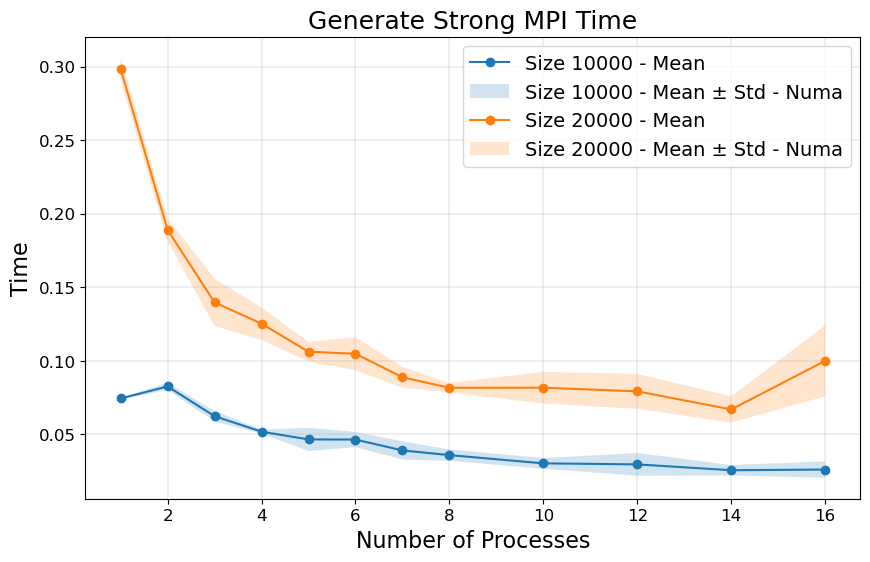

In [131]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have your DataFrame, let's call it 'df'

# Separate the DataFrame into two subsets based on size

# Separate the DataFrame into two subsets based on size
df_10000_socket = grouped_df_initialize_generate[(grouped_df_initialize_generate['size'] == 10000) & (grouped_df_initialize_generate['type'] == 'socket')]
df_20000_socket= grouped_df_initialize_generate[(grouped_df_initialize_generate['size'] == 20000) & (grouped_df_initialize_generate['type'] == 'socket')]

df_10000_numa = grouped_df_initialize_generate[(grouped_df_initialize_generate['size'] == 10000) & (grouped_df_initialize_generate['type'] == 'numa')]
df_20000_numa = grouped_df_initialize_generate[(grouped_df_initialize_generate['size'] == 20000) & (grouped_df_initialize_generate['type'] == 'numa')]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot for size 10000
#plt.plot(df_10000_socket['processes'], df_10000_socket['mean_time'], label='Size 10000 - Mean', marker='o')
#plt.fill_between(df_10000_socket['processes'], df_10000_socket['mean_time'] - df_10000_socket['std_time'], df_10000_socket['mean_time'] + df_10000_socket['std_time'], alpha=0.2, label='Size 10000 - Mean ± Std - Socket')

# Plot for size 20000
#plt.plot(df_20000_socket['processes'], df_20000_socket['mean_time'], label='Size 20000 - Mean', marker='o')
#plt.fill_between(df_20000_socket['processes'], df_20000_socket['mean_time'] - df_20000_socket['std_time'], df_20000_socket['mean_time'] + df_20000_socket['std_time'], alpha=0.2, label='Size 20000 - Mean ± Std - Socket')

# Plot for size 10000
plt.plot(df_10000_numa['processes'], df_10000_numa['mean_time'], label='Size 10000 - Mean', marker='o')
plt.fill_between(df_10000_numa['processes'], df_10000_numa['mean_time'] - df_10000_numa['std_time'], df_10000_numa['mean_time'] + df_10000_numa['std_time'], alpha=0.2, label='Size 10000 - Mean ± Std - Numa')

# Plot for size 20000
plt.plot(df_20000_numa['processes'], df_20000_numa['mean_time'], label='Size 20000 - Mean', marker='o')
plt.fill_between(df_20000_numa['processes'], df_20000_numa['mean_time'] - df_20000_numa['std_time'], df_20000_numa['mean_time'] + df_20000_numa['std_time'], alpha=0.2, label='Size 20000 - Mean ± Std - Numa')

# Add labels and title
plt.xlabel('Number of Processes', fontsize = 16)
plt.ylabel('Time', fontsize = 16)
plt.title('Generate Strong MPI Time', fontsize = 18)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend(fontsize=14)

# Show the plot
plt.grid(linewidth = 0.3)
plt.show()

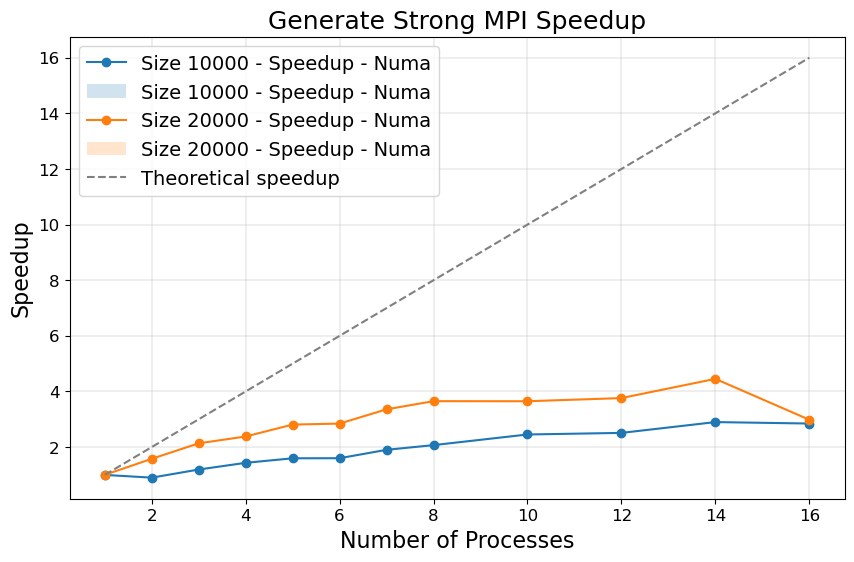

In [133]:
plt.figure(figsize=(10, 6))

# Plot for size 10000
plt.plot(df_10000_numa['processes'], df_10000_numa['speedup'], label='Size 10000 - Speedup - Numa', marker='o')
plt.fill_between(df_10000_numa['processes'], df_10000_numa['speedup'] - df_10000_numa['std_time'], df_10000_numa['speedup'] + df_10000_numa['std_time'], alpha=0.2, label='Size 10000 - Speedup - Numa')

# Plot for size 20000
plt.plot(df_20000_numa['processes'], df_20000_numa['speedup'], label='Size 20000 - Speedup - Numa', marker='o')
plt.fill_between(df_20000_numa['processes'], df_20000_numa['speedup'] - df_20000_numa['std_time'], df_20000_numa['speedup'] + df_20000_numa['std_time'], alpha=0.2, label='Size 20000 - Speedup - Numa')

plt.plot(df_20000_numa['processes'], df_20000_numa['processes'], linestyle='--', color='gray', label='Theoretical speedup')

# Add labels and title
plt.xlabel('Number of Processes', fontsize = 16)
plt.ylabel('Speedup', fontsize = 16)
plt.title('Generate Strong MPI Speedup', fontsize = 18)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend(fontsize=14)

# Show the plot
plt.grid(linewidth = 0.3)
plt.show()

# Write 

CASOMAI QUA RACCATTEREI ALTRI DATI PER FAR VEDERE CHE IL DROP IN SPEED AVVIENE APPENA INIZIAMO A SCRIVERE DA DUE NODI

In [40]:
df_initialize_write = df[df['section']=='initialization_write']

grouped_df_initialize_write = df_initialize_write.groupby(['size', 'processes', 'type'])['time'].agg(['mean', 'std']).reset_index()
grouped_df_initialize_write = grouped_df_initialize_write.rename(columns={'mean': 'mean_time', 'std': 'std_time'})
grouped_df_initialize_write = grouped_df_initialize_write.groupby('size', group_keys=False).apply(calculate_speedup).reset_index(drop=True)
grouped_df_initialize_write

,size,processes,type,mean_time,std_time,speedup
0,10000,1,socket,0.078900,0.017651,1.000000
1,10000,2,socket,0.990698,0.098135,0.079641
2,10000,3,socket,2.822994,1.353779,0.027949
3,10000,4,socket,1.858038,0.172233,0.042464
4,10000,5,socket,1.887456,0.131017,0.041802
5,10000,6,socket,2.400248,0.628166,0.032872
6,10000,7,socket,2.220642,0.466038,0.035530
7,10000,8,socket,1.945875,0.121904,0.040547
8,20000,1,numa,0.195260,0.003041,1.000000
9,20000,1,socket,0.223800,0.021044,0.872479


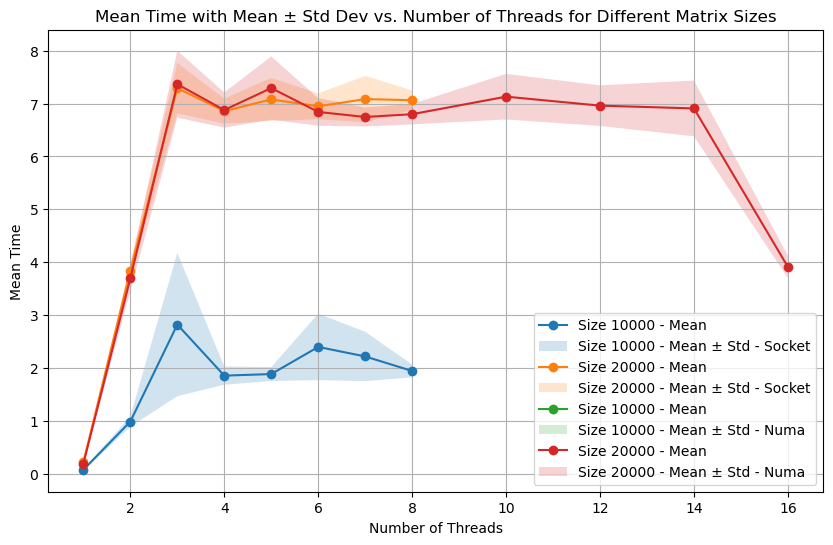

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have your DataFrame, let's call it 'df'

# Separate the DataFrame into two subsets based on size

# Separate the DataFrame into two subsets based on size
df_10000_socket = grouped_df_initialize_write[(grouped_df_initialize_write['size'] == 10000) & (grouped_df_initialize_write['type'] == 'socket')]
df_20000_socket = grouped_df_initialize_write[(grouped_df_initialize_write['size'] == 20000) & (grouped_df_initialize_write['type'] == 'socket')]

df_10000_numa = grouped_df_initialize_write[(grouped_df_initialize_write['size'] == 10000) & (grouped_df_initialize_write['type'] == 'numa')]
df_20000_numa = grouped_df_initialize_write[(grouped_df_initialize_write['size'] == 20000) & (grouped_df_initialize_write['type'] == 'numa')]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot for size 10000
plt.plot(df_10000_socket['processes'], df_10000_socket['mean_time'], label='Size 10000 - Mean', marker='o')
plt.fill_between(df_10000_socket['processes'], df_10000_socket['mean_time'] - df_10000_socket['std_time'], df_10000_socket['mean_time'] + df_10000_socket['std_time'], alpha=0.2, label='Size 10000 - Mean ± Std - Socket')

# Plot for size 20000
plt.plot(df_20000_socket['processes'], df_20000_socket['mean_time'], label='Size 20000 - Mean', marker='o')
plt.fill_between(df_20000_socket['processes'], df_20000_socket['mean_time'] - df_20000_socket['std_time'], df_20000_socket['mean_time'] + df_20000_socket['std_time'], alpha=0.2, label='Size 20000 - Mean ± Std - Socket')

# Plot for size 10000
plt.plot(df_10000_numa['processes'], df_10000_numa['mean_time'], label='Size 10000 - Mean', marker='o')
plt.fill_between(df_10000_numa['processes'], df_10000_numa['mean_time'] - df_10000_numa['std_time'], df_10000_numa['mean_time'] + df_10000_numa['std_time'], alpha=0.2, label='Size 10000 - Mean ± Std - Numa')

# Plot for size 20000
plt.plot(df_20000_numa['processes'], df_20000_numa['mean_time'], label='Size 20000 - Mean', marker='o')
plt.fill_between(df_20000_numa['processes'], df_20000_numa['mean_time'] - df_20000_numa['std_time'], df_20000_numa['mean_time'] + df_20000_numa['std_time'], alpha=0.2, label='Size 20000 - Mean ± Std - Numa')

# Add labels and title
plt.xlabel('Number of Threads')
plt.ylabel('Mean Time')
plt.title('Mean Time with Mean ± Std Dev vs. Number of Threads for Different Matrix Sizes')

# Add legend
plt.legend()

# Show the plot
plt.grid()
plt.show()

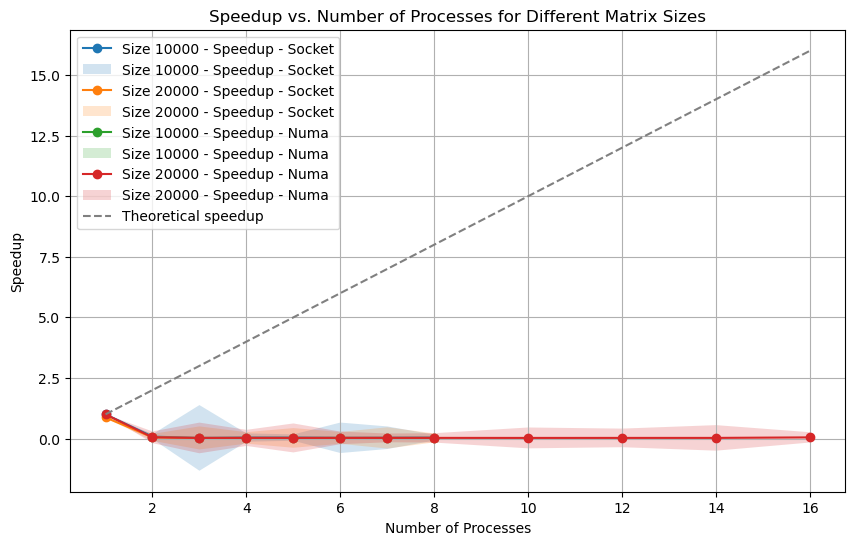

In [42]:
plt.figure(figsize=(10, 6))

# Plot for size 10000
plt.plot(df_10000_socket['processes'], df_10000_socket['speedup'], label='Size 10000 - Speedup - Socket', marker='o')
plt.fill_between(df_10000_socket['processes'], df_10000_socket['speedup'] - df_10000_socket['std_time'], df_10000_socket['speedup'] + df_10000_socket['std_time'], alpha=0.2, label='Size 10000 - Speedup - Socket')

# Plot for size 20000
plt.plot(df_20000_socket['processes'], df_20000_socket['speedup'], label='Size 20000 - Speedup - Socket', marker='o')
plt.fill_between(df_20000_socket['processes'], df_20000_socket['speedup'] - df_20000_socket['std_time'], df_20000_socket['speedup'] + df_20000_socket['std_time'], alpha=0.2, label='Size 20000 - Speedup - Socket')

# Plot for size 10000
plt.plot(df_10000_numa['processes'], df_10000_numa['speedup'], label='Size 10000 - Speedup - Numa', marker='o')
plt.fill_between(df_10000_numa['processes'], df_10000_numa['speedup'] - df_10000_numa['std_time'], df_10000_numa['speedup'] + df_10000_numa['std_time'], alpha=0.2, label='Size 10000 - Speedup - Numa')

# Plot for size 20000
plt.plot(df_20000_numa['processes'], df_20000_numa['speedup'], label='Size 20000 - Speedup - Numa', marker='o')
plt.fill_between(df_20000_numa['processes'], df_20000_numa['speedup'] - df_20000_numa['std_time'], df_20000_numa['speedup'] + df_20000_numa['std_time'], alpha=0.2, label='Size 20000 - Speedup - Numa')

plt.plot(df_20000_numa['processes'], df_20000_numa['processes'], linestyle='--', color='gray', label='Theoretical speedup')

# Add labels and title
plt.xlabel('Number of Processes')
plt.ylabel('Speedup')
plt.title('Speedup vs. Number of Processes for Different Matrix Sizes')

# Add legend
plt.legend()

# Show the plot
plt.grid()
plt.show()

# WEAK MPI SCALABILITY
# Evolve Static

In [80]:
current_directory = os.getcwd()
print("Current Working Directory:", current_directory) # To reset wd to default one

sections = ['initialization','evolve_static', 'evolve_ordered']
df = pd.DataFrame(columns=['size', 'processes', 'time', 'section'])
df


for sec in sections:
    if sec == 'initialization':
        file_pattern=f"results/{sec}/weak_MPI_generate.csv"
        df_temp = pd.read_csv(file_pattern)
        df_temp['section'] = sec + "_generate"
        df=pd.concat([df, df_temp])

        file_pattern=f"results/{sec}/weak_MPI_write.csv"
        df_temp = pd.read_csv(file_pattern)
        df_temp['section'] = sec + "_write"
        df=pd.concat([df, df_temp])
    else:
        file_pattern=f"results/{sec}/weak_MPI.csv"
        df_temp = pd.read_csv(file_pattern)
        df_temp['section'] = sec
        df=pd.concat([df, df_temp])

Current Working Directory: /Users/samuele/Documents/Università/Magistrale/Corsi/HPC/FHPC_Assignment/Exercise1


In [81]:
df

,size,processes,time,section
0,10000,1,0.067411,initialization_generate
1,10000,1,0.058125,initialization_generate
2,10000,1,0.067019,initialization_generate
3,10000,1,0.041703,initialization_generate
4,10000,1,0.062820,initialization_generate
...,...,...,...,...
15,20000,4,1617.194966,evolve_ordered
16,20000,4,1617.748876,evolve_ordered
17,20000,4,1617.722912,evolve_ordered
18,20000,4,1615.455682,evolve_ordered


# Evolve static
Now, for example, to analyze the openMP scalability of evolve static, we can simply slice the corresponding part of the dataframe

In [82]:
df_evolve_static = df[df['section']=='evolve_static']
df_evolve_static

,size,processes,time,section
0,10000,1,4.906292,evolve_static
1,10000,1,4.903821,evolve_static
2,10000,1,4.933269,evolve_static
3,10000,1,4.902550,evolve_static
4,10000,1,4.905148,evolve_static
5,14142,2,4.908418,evolve_static
6,14142,2,4.933104,evolve_static
7,14142,2,4.908690,evolve_static
8,14142,2,4.897066,evolve_static
9,14142,2,4.909147,evolve_static


In [83]:
grouped_df_evolve_static = df_evolve_static.groupby(['size', 'processes'])['time'].agg(['mean', 'std']).reset_index()
grouped_df_evolve_static = grouped_df_evolve_static.rename(columns={'mean': 'mean_time', 'std': 'std_time'})
grouped_df_evolve_static['speedup'] = grouped_df_evolve_static['mean_time'][0] / grouped_df_evolve_static['mean_time'] 
grouped_df_evolve_static

,size,processes,mean_time,std_time,speedup
0,10000,1,4.910216,0.012963,1.000000
1,14142,2,4.911285,0.013208,0.999782
2,17320,3,4.984596,0.031740,0.985078
3,20000,4,5.023335,0.026029,0.977481
4,22360,5,4.991855,0.014388,0.983646
5,24494,6,5.039287,0.014844,0.974387


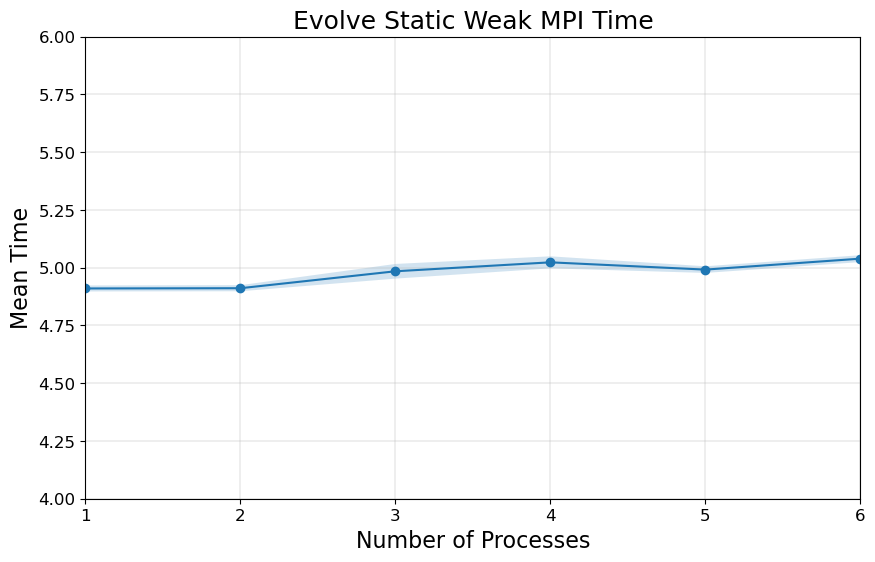

In [90]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot 
plt.plot(grouped_df_evolve_static['processes'], grouped_df_evolve_static['mean_time'],  marker='o')
plt.fill_between(grouped_df_evolve_static['processes'], grouped_df_evolve_static['mean_time'] - grouped_df_evolve_static['std_time'], grouped_df_evolve_static['mean_time'] + grouped_df_evolve_static['std_time'], alpha=0.2)


# Add labels and title
plt.xlabel('Number of processes')
plt.ylabel('Mean Time')
plt.title('Mean Time with Mean ± Std Dev vs. Number of Processes for Different Matrix Sizes')

# Add legend
plt.axis([1, 6, 4, 6])

# Add labels and title
plt.xlabel('Number of Processes', fontsize = 16)
plt.ylabel('Mean Time', fontsize = 16)
plt.title('Evolve Static Weak MPI Time', fontsize = 18)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend


# Show the plot
plt.grid(linewidth = 0.3)
plt.show()

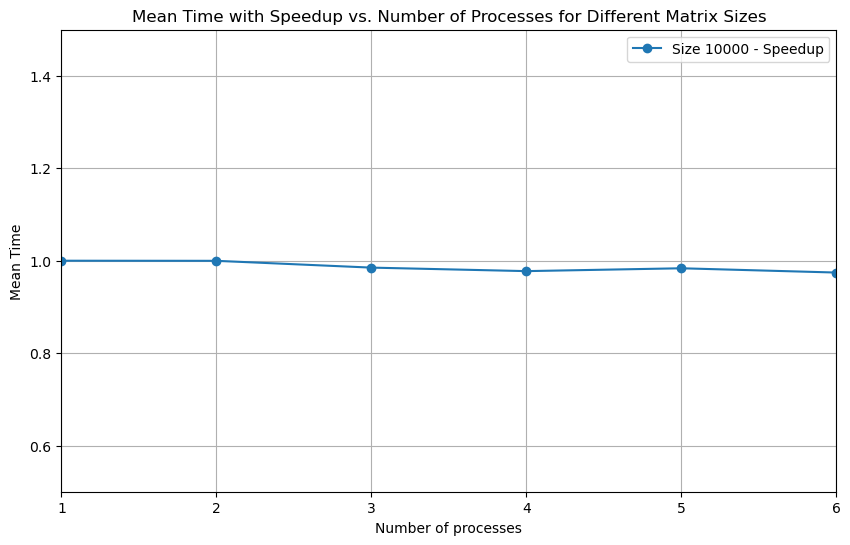

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have your DataFrame, let's call it 'df'

# Separate the DataFrame into two subsets based on size

# Create the plot
plt.figure(figsize=(10, 6))

# Plot for size 10000
plt.plot(grouped_df_evolve_static['processes'], grouped_df_evolve_static['speedup'], label='Size 10000 - Speedup', marker='o')


# Theoretical speedup

# Add labels and title
plt.xlabel('Number of processes')
plt.ylabel('Mean Time')
plt.title('Mean Time with Speedup vs. Number of Processes for Different Matrix Sizes')
plt.axis([1, 6, 0.5, 1.5])

# Add legend
plt.legend()

# Show the plot
plt.grid()
plt.show()

# Evolve Ordered

In [85]:
df_evolve_ordered = df[df['section']=='evolve_ordered'] # ONLY NUMA
df_evolve_ordered

grouped_df_evolve_ordered = df_evolve_ordered.groupby(['size', 'processes'])['time'].agg(['mean', 'std']).reset_index()
grouped_df_evolve_ordered = grouped_df_evolve_ordered.rename(columns={'mean': 'mean_time', 'std': 'std_time'})
grouped_df_evolve_ordered['speedup'] = grouped_df_evolve_ordered['mean_time'][0] / grouped_df_evolve_ordered['mean_time'] 
grouped_df_evolve_ordered

,size,processes,mean_time,std_time,speedup
0,10000,1,309.914232,0.016948,1.000000
1,14142,2,805.550175,0.097419,0.384724
2,17320,3,1224.660493,9.580249,0.253061
3,20000,4,1616.890167,0.987051,0.191673


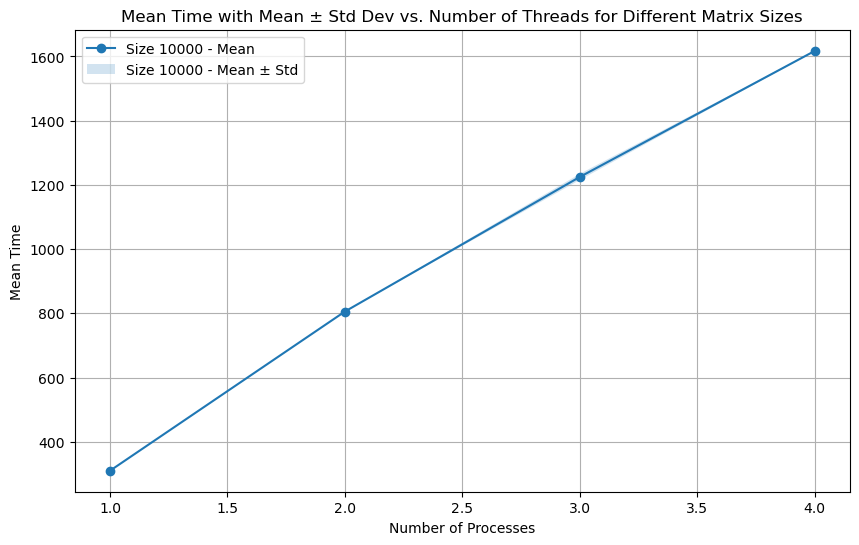

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have your DataFrame, let's call it 'df'

# Separate the DataFrame into two subsets based on size

# Create the plot
plt.figure(figsize=(10, 6))

# Plot for size 10000
plt.plot(grouped_df_evolve_ordered['processes'], grouped_df_evolve_ordered['mean_time'], label='Size 10000 - Mean', marker='o')
plt.fill_between(grouped_df_evolve_ordered['processes'], grouped_df_evolve_ordered['mean_time'] - grouped_df_evolve_ordered['std_time'], grouped_df_evolve_ordered['mean_time'] + grouped_df_evolve_ordered['std_time'], alpha=0.2, label='Size 10000 - Mean ± Std')

# Add labels and title
plt.xlabel('Number of Processes')
plt.ylabel('Mean Time')
plt.title('Mean Time with Mean ± Std Dev vs. Number of Threads for Different Matrix Sizes')

# Add legend
plt.legend()

# Show the plot
plt.grid()
plt.show()

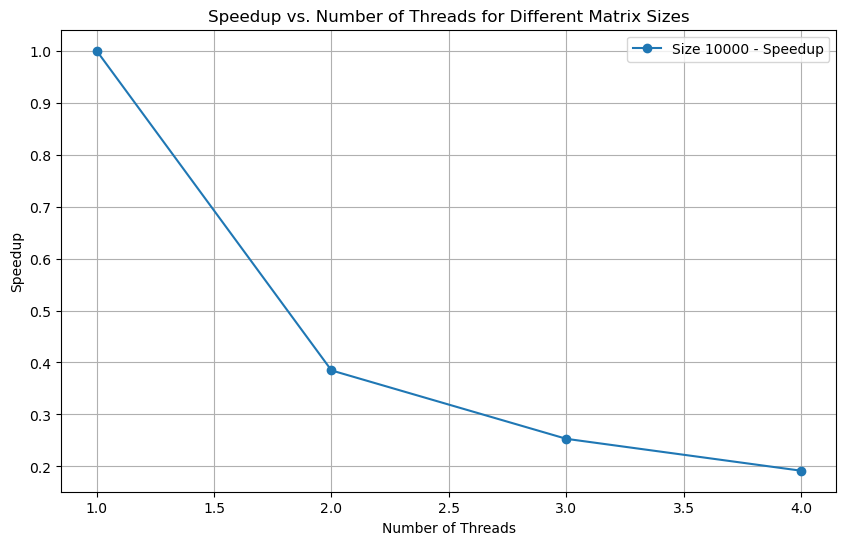

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have your DataFrame, let's call it 'df'

# Create the plot
plt.figure(figsize=(10, 6))

# Plot for size 10000
plt.plot(grouped_df_evolve_ordered['processes'], grouped_df_evolve_ordered['speedup'], label='Size 10000 - Speedup', marker='o')

# Plot to show optimal speedup
#plt.plot(grouped_df_evolve_ordered['threads'], grouped_df_evolve_ordered['threads'], linestyle='--', color='gray', label='Theoretical speedup')


# Add labels and title
plt.xlabel('Number of Threads')
plt.ylabel('Speedup')
plt.title('Speedup vs. Number of Threads for Different Matrix Sizes')

# Add legend
plt.legend()

# Show the plot
plt.grid()
plt.show()


# Generate

In [90]:
df_initialize_generate = df[df['section']=='initialization_generate']

grouped_df_initialize_generate = df_initialize_generate.groupby(['size', 'processes', 'section'])['time'].agg(['mean', 'std']).reset_index()
grouped_df_initialize_generate = grouped_df_initialize_generate.rename(columns={'mean': 'mean_time', 'std': 'std_time'})
grouped_df_initialize_generate['speedup'] = grouped_df_initialize_generate['mean_time'][0] / grouped_df_initialize_generate['mean_time'] 
grouped_df_initialize_generate

,size,processes,section,mean_time,std_time,speedup
0,10000,1,initialization_generate,0.059416,0.010592,1.000000
1,14142,2,initialization_generate,0.059211,0.009840,1.003449
2,17320,3,initialization_generate,0.061868,0.011636,0.960358
3,20000,4,initialization_generate,0.077029,0.004292,0.771341
4,22360,5,initialization_generate,0.076548,0.023980,0.776192
5,24494,6,initialization_generate,0.075666,0.010647,0.785231


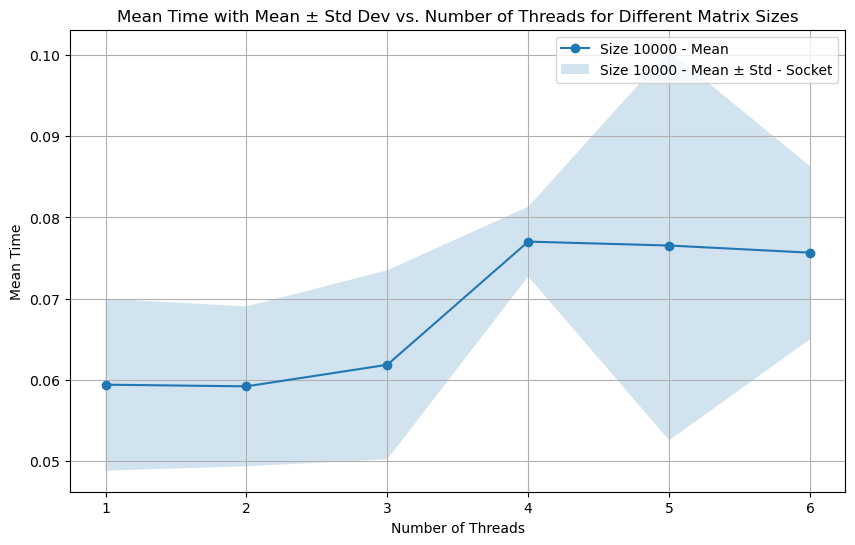

In [91]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot for size 10000
plt.plot(grouped_df_initialize_generate['processes'], grouped_df_initialize_generate['mean_time'], label='Size 10000 - Mean', marker='o')
plt.fill_between(grouped_df_initialize_generate['processes'], grouped_df_initialize_generate['mean_time'] - grouped_df_initialize_generate['std_time'], grouped_df_initialize_generate['mean_time'] + grouped_df_initialize_generate['std_time'], alpha=0.2, label='Size 10000 - Mean ± Std')

# Add labels and title
plt.xlabel('Number of Threads')
plt.ylabel('Mean Time')
plt.title('Mean Time with Mean ± Std Dev vs. Number of Threads for Different Matrix Sizes')

# Add legend
plt.legend()

# Show the plot
plt.grid()
plt.show()

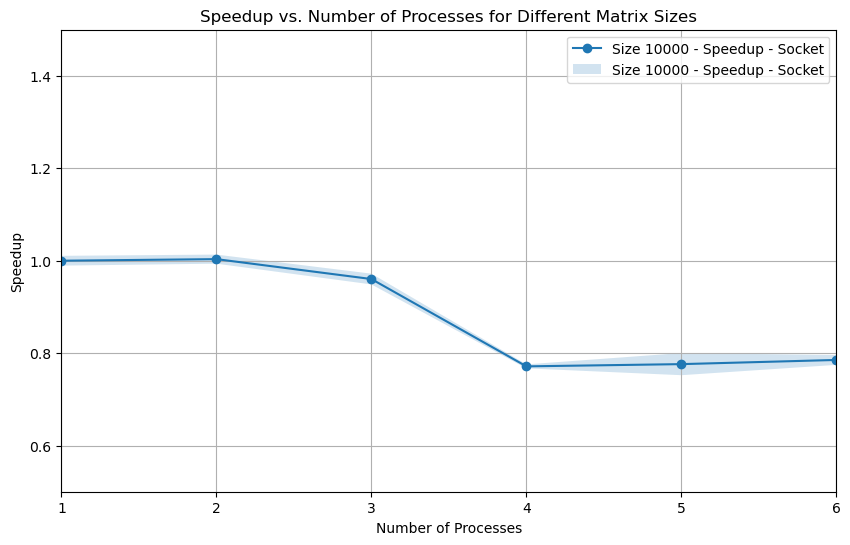

In [96]:
plt.figure(figsize=(10, 6))

# Plot for size 10000
plt.plot(grouped_df_initialize_generate['processes'], grouped_df_initialize_generate['speedup'], label='Size 10000 - Speedup - Socket', marker='o')
plt.fill_between(grouped_df_initialize_generate['processes'], grouped_df_initialize_generate['speedup'] - grouped_df_initialize_generate['std_time'], grouped_df_initialize_generate['speedup'] + grouped_df_initialize_generate['std_time'], alpha=0.2, label='Size 10000 - Speedup')


# Add labels and title
plt.xlabel('Number of Processes')
plt.ylabel('Speedup')
plt.title('Speedup vs. Number of Processes for Different Matrix Sizes')
plt.axis([1, 6, 0.5, 1.5])

# Add legend
plt.legend()

# Show the plot
plt.grid()
plt.show()

# Write 

CASOMAI QUA RACCATTEREI ALTRI DATI PER FAR VEDERE CHE IL DROP IN SPEED AVVIENE APPENA INIZIAMO A SCRIVERE DA DUE NODI

In [97]:
df_initialize_write = df[df['section']=='initialization_write']

grouped_df_initialize_write = df_initialize_write.groupby(['size', 'processes'])['time'].agg(['mean', 'std']).reset_index()
grouped_df_initialize_write = grouped_df_initialize_write.rename(columns={'mean': 'mean_time', 'std': 'std_time'})
grouped_df_initialize_write['speedup'] = grouped_df_initialize_write['mean_time'][0] / grouped_df_initialize_write['mean_time'] 
grouped_df_initialize_write

,size,processes,mean_time,std_time,speedup
0,10000,1,0.114013,0.070460,1.000000
1,14142,2,1.871213,0.076771,0.060930
2,17320,3,6.064794,0.686154,0.018799
3,20000,4,7.209785,0.310205,0.015814
4,22360,5,9.180692,0.256100,0.012419
5,24494,6,10.555039,0.421588,0.010802


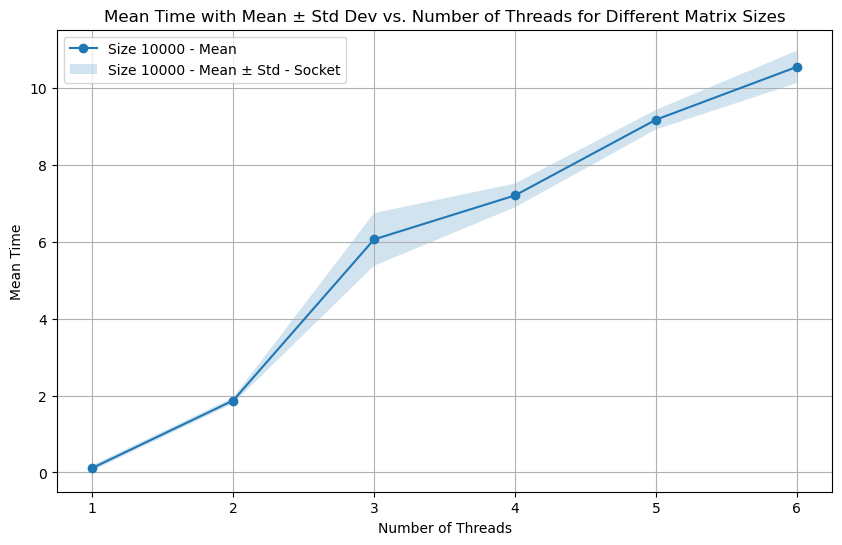

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have your DataFrame, let's call it 'df'

# Separate the DataFrame into two subsets based on size

# Separate the DataFrame into two subsets based on size
# Create the plot
plt.figure(figsize=(10, 6))

# Plot for size 10000
plt.plot(grouped_df_initialize_write['processes'], grouped_df_initialize_write['mean_time'], label='Size 10000 - Mean', marker='o')
plt.fill_between(grouped_df_initialize_write['processes'], grouped_df_initialize_write['mean_time'] - grouped_df_initialize_write['std_time'], grouped_df_initialize_write['mean_time'] + grouped_df_initialize_write['std_time'], alpha=0.2, label='Size 10000 - Mean ± Std')

# Add labels and title
plt.xlabel('Number of Threads')
plt.ylabel('Mean Time')
plt.title('Mean Time with Mean ± Std Dev vs. Number of Threads for Different Matrix Sizes')

# Add legend
plt.legend()

# Show the plot
plt.grid()
plt.show()

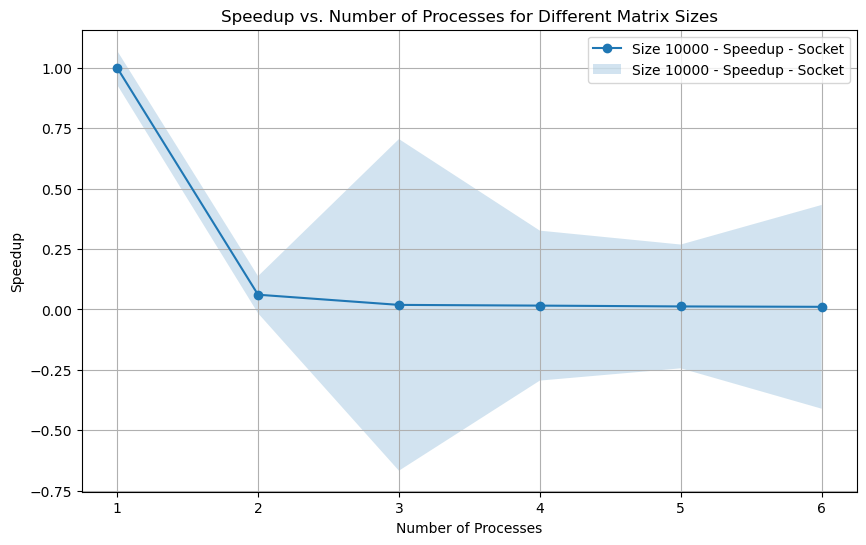

In [99]:
plt.figure(figsize=(10, 6))

# Plot for size 10000
plt.plot(grouped_df_initialize_write['processes'], grouped_df_initialize_write['speedup'], label='Size 10000 - Speedup - Socket', marker='o')
plt.fill_between(grouped_df_initialize_write['processes'], grouped_df_initialize_write['speedup'] - grouped_df_initialize_write['std_time'], grouped_df_initialize_write['speedup'] + grouped_df_initialize_write['std_time'], alpha=0.2, label='Size 10000 - Speedup')

# Add labels and title
plt.xlabel('Number of Processes')
plt.ylabel('Speedup')
plt.title('Speedup vs. Number of Processes for Different Matrix Sizes')

# Add legend
plt.legend()

# Show the plot
plt.grid()
plt.show()

# Evolve BW

In [151]:
file_path = 'results/evolve_black_white/openMP.csv'
df_BW = pd.read_csv(file_path)
df_BW

,size,threads,time
0,9999,1,303.313253
1,9999,1,304.109194
2,9999,1,304.014889
3,9999,1,303.421690
4,9999,1,303.827044
...,...,...,...
136,20000,64,35.906432
137,20000,64,36.044899
138,20000,64,36.365420
139,20000,64,36.053151


In [152]:
df_BW_grouped = df_BW.groupby(['size', 'threads'])['time'].agg(['mean', 'std']).reset_index() 
df_BW_grouped = df_BW_grouped.rename(columns={'mean': 'mean_time', 'std': 'std_time'})
df_BW_grouped = df_BW_grouped.groupby('size', group_keys=False).apply(calculate_speedup).reset_index(drop=True)
df_BW_grouped

,size,threads,mean_time,std_time,speedup
0,9999,1,303.737214,0.354556,1.000000
1,9999,2,152.739426,0.129210,1.988597
2,9999,4,77.565299,0.221009,3.915890
3,9999,8,41.346379,0.147504,7.346162
4,9999,16,23.554353,0.048736,12.895163
5,9999,32,16.241721,0.018776,18.701049
6,9999,64,16.565986,0.071878,18.334992
7,10000,1,321.854966,0.049527,1.000000
8,10000,2,162.423201,0.207277,1.981582
9,10000,4,82.134505,0.036626,3.918633


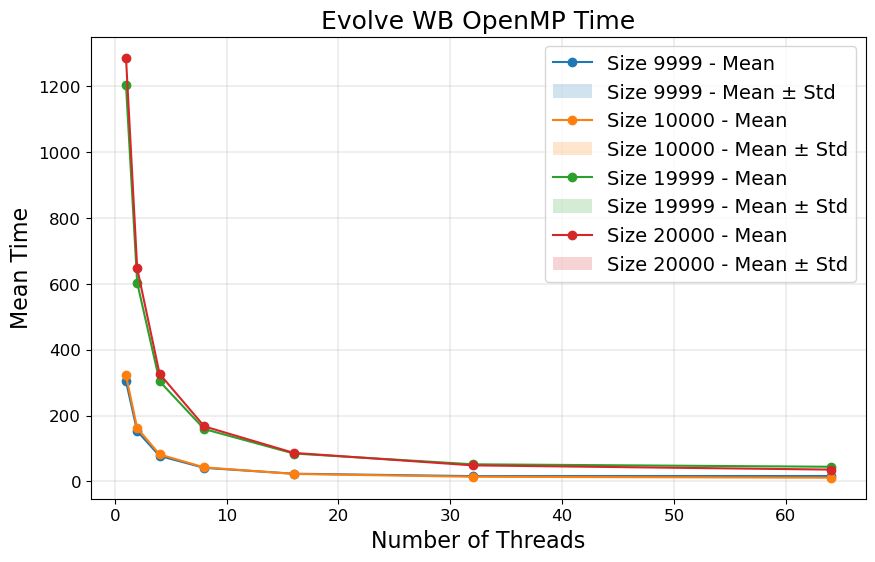

In [156]:
# Separate the DataFrame into two subsets based on size
df_9999 = df_BW_grouped[df_BW_grouped['size'] == 9999]
df_10000 = df_BW_grouped[df_BW_grouped['size'] == 10000]
df_19999 = df_BW_grouped[df_BW_grouped['size'] == 19999]
df_20000 = df_BW_grouped[df_BW_grouped['size'] == 20000]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot for size 9999
plt.plot(df_9999['threads'], df_9999['mean_time'], label='Size 9999 - Mean', marker='o')
plt.fill_between(df_9999['threads'], df_9999['mean_time'] - df_9999['std_time'], df_9999['mean_time'] + df_9999['std_time'], alpha=0.2, label='Size 9999 - Mean ± Std')

# Plot for size 10000
plt.plot(df_10000['threads'], df_10000['mean_time'], label='Size 10000 - Mean', marker='o')
plt.fill_between(df_10000['threads'], df_10000['mean_time'] - df_10000['std_time'], df_10000['mean_time'] + df_10000['std_time'], alpha=0.2, label='Size 10000 - Mean ± Std')

# Plot for size 19999
plt.plot(df_19999['threads'], df_19999['mean_time'], label='Size 19999 - Mean', marker='o')
plt.fill_between(df_19999['threads'], df_19999['mean_time'] - df_19999['std_time'], df_19999['mean_time'] + df_19999['std_time'], alpha=0.2, label='Size 19999 - Mean ± Std')

# Plot for size 20000
plt.plot(df_20000['threads'], df_20000['mean_time'], label='Size 20000 - Mean', marker='o')
plt.fill_between(df_20000['threads'], df_20000['mean_time'] - df_20000['std_time'], df_20000['mean_time'] + df_20000['std_time'], alpha=0.2, label='Size 20000 - Mean ± Std')


# Add labels and title
plt.xlabel('Number of Threads', fontsize = 16)
plt.ylabel('Mean Time', fontsize = 16)
plt.title('Evolve WB OpenMP Time', fontsize = 18)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend(fontsize=14)

# Show the plot
plt.grid(linewidth = 0.3)
plt.show()

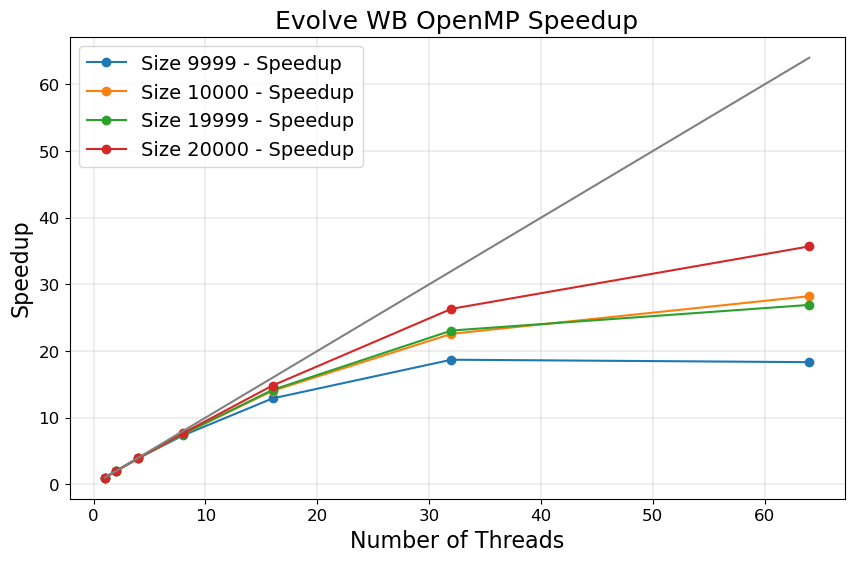

In [158]:
# Separate the DataFrame into two subsets based on size
df_9999 = df_BW_grouped[df_BW_grouped['size'] == 9999]
df_10000 = df_BW_grouped[df_BW_grouped['size'] == 10000]
df_19999 = df_BW_grouped[df_BW_grouped['size'] == 19999]
df_20000 = df_BW_grouped[df_BW_grouped['size'] == 20000]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot for size 9999
plt.plot(df_9999['threads'], df_9999['speedup'], label='Size 9999 - Speedup', marker='o')

# Plot for size 10000
plt.plot(df_10000['threads'], df_10000['speedup'], label='Size 10000 - Speedup', marker='o')

# Plot for size 19999
plt.plot(df_19999['threads'], df_19999['speedup'], label='Size 19999 - Speedup', marker='o')

# Plot for size 20000
plt.plot(df_20000['threads'], df_20000['speedup'], label='Size 20000 - Speedup', marker='o')

# Theoretical speedup
plt.plot(df_20000['threads'], df_20000['threads'], c="gray")


# Add labels and title
plt.xlabel('Number of Threads', fontsize = 16)
plt.ylabel('Speedup', fontsize = 16)
plt.title('Evolve WB OpenMP Speedup', fontsize = 18)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend(fontsize=14)

# Show the plot
plt.grid(linewidth = 0.3)
plt.show()